In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('클래스 레이블:', np.unique(y)) ##붓꽃 클래스 이름인 Iris-setosa,versicolor,virginica 는 0,1,2라는 정수 형태로 저장

클래스 레이블: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

##model_selection 모듈의 train_test_split 함수가 X와 y의 배열을 랜덤하게 나눈다.(30%는 테스트 데이터, 70%는 훈련 데이터)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1, ##유사 난수 생성기에 랜덤시드(1)을 전달
    stratify=y ##계층화 기능 사용 => 훈련 세트와 테스트 세트의 클래스 레이블 비율을 입력 데이터셋과 동일하게 만든다.
    )

##계층화 확인 과정
print('y의 레이블 카운트:', np.bincount(y)) ##bincount 함수는 배열에 있는 고유한 값의 등장 횟수를 파악
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))


y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [3]:
##경사 하강법

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) ##fit은 훈련 셑의 각 특성 차원마다 샘플평균(u)와 표준편차를 계산
X_train_std = sc.transform(X_train) ##transform 매서드를 통해 계산된 샘플평균과 표준편차를 이용해서 훈련세트 표준화
X_test_std = sc.transform(X_test) ##위와 동일하세 테스트 세트 표준화


In [4]:
## 퍼셉트론 모델 훈련
##OvR(One-wersus-Rest) 방식을 사용해서 다중 분류 지원

from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, ##훈련세트를 반복할 에포크 횟수
                 eta0=0.1,
                 tol=1e-3, 
                 random_state=1)
ppn.fit(X_train_std, y_train)



Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
##predict 매서드로 예측 만들기

y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' %(y_test != y_pred).sum()) ##45개중 1개를 잘못 분류 오차 0.022(1/45), 정확도는 0.98(1 - 오차)

잘못 분류된 샘플 개수: 1


In [6]:
#테스트 세트에서 퍼셉트론의 분류 정확도 계산

from sklearn.metrics import accuracy_score
print('정확도: %.2f' % accuracy_score(y_test, y_pred))

정확도: 0.98


In [7]:
##분류기의 예측 정확도를 계산하는 score 매서드
print('정확도: %.2f' % ppn.score(X_test_std, y_test))

정확도: 0.98


In [8]:
##시각화 하는 함수

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    #마커와 컬러맵 설정
    markers = ('s','x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #결정경계 그리기
    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolors='black')

    #테스트샘플을 부각해서 그린다
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolors='black', alpha=1.0,
                    linewidths=1, marker='o',
                    s=100, label='test set')


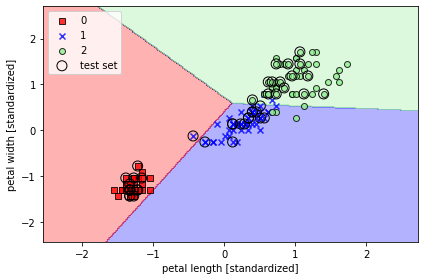

In [11]:
##결과 그래프에 표시할 테스트 샘플 인덱스를 지정 가능

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

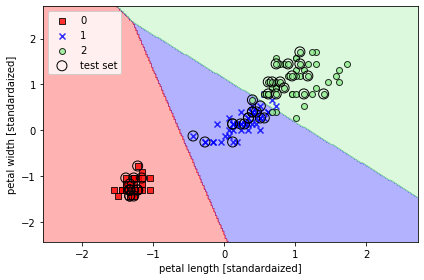

In [12]:
##사이킷런에서 로지스틱 회귀 사용하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100.0, random_state=1)

lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardaized]')
plt.ylabel('petal width [standardaized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
##테스트 세트에 있는 처음 세 개의 샘플 확률 예측
lr.predict_proba(X_test_std[:3,:])

#첫 행은 첫 번째 붓꽃의 클래스 소속 확률 => 여기서 가장 큰 값이 대략 0.85511...인데 이 건 첫 샘플이 클래스 3(Iris-virginica)에 속할 확률이 85.5%라는 뜻
#두 번째 행은 두 번째 붓꽃 클래스 소속 확률

#모든 열을 더하면 1이 된다
# lr.predict_proba(X_test_std[:3,:]).sum(axis=1)


array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [16]:
##행에서 가장 큰 값의 열이 예측 클래스 레이블이된다.
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [17]:
##직접 predict 메서드를 호출해서도 확인 가능
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [18]:
##샘플 하나의 클래스 레이블을 예측할 때 주의 점. => 사이킷런은 입력 데이터로 2차원 배열을 기대한다. 하나의 행을 2차원 포맷으로 변경해야함.(reshape 메서드를 사용해서 새로운 차원을 추가하는 것)
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

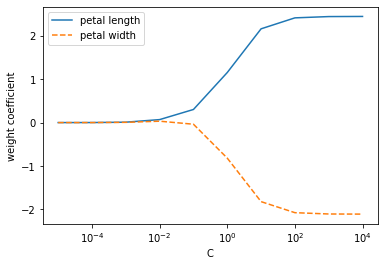

In [23]:
#L2 규제 효과를 그래프로
weights, params =[], []
for c in np.arange(-5,5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

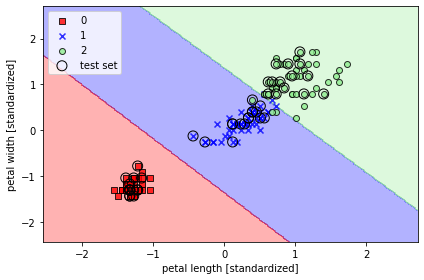

In [24]:
##서포트 벡터 머신(SVM) 붓곷 데이터셋의 꽃 분류에 훈련하기
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

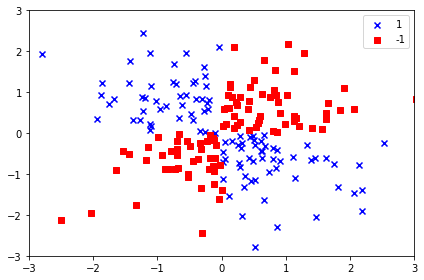

In [25]:
##선형적으로 구분되지 않는 데이터를 위한 커널 방법
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

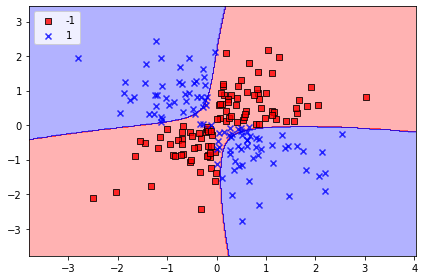

In [26]:
##커널(유사도 함수) SVM 을 훈련해서 비선형 결정 경계 그리기
svm = SVC(kernel='rbf', #선형 데이터 훈련 시에는 linear
          random_state=1,
          gamma=0.10, #가우시안 구의 크기를 제한하는 변수. 크게하면 서포트 벡터의 영향이나 범위가 줄어든다.
          C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

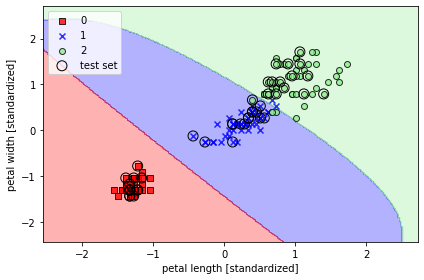

In [27]:
#붓꽃 데이터셋에 rbf커널 적용
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

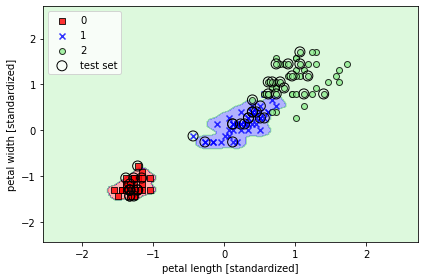

In [28]:
#가우시안 구 이해하기(gamma 값 크게 변경)
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

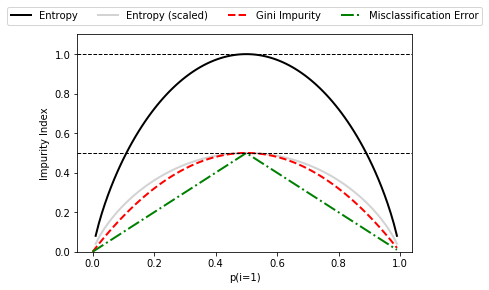

In [29]:
##지니 불순도

def gini(p):
    return (p)*(1 - (p)) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                          ['-','-','--','-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

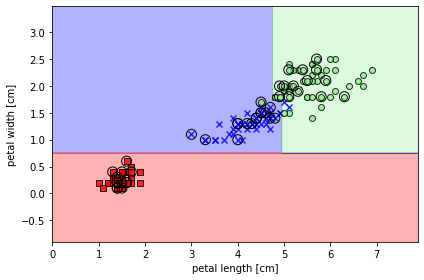

In [31]:
##지니 불순도 조건으로 최대 깊이가 4인 결정트리 훈련하기
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(criterion='gini',
                             max_depth=4,
                             random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=tree,
                      test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.tight_layout()
plt.show()

In [35]:
##pydotplus는 png형태의 결정트리 이미지를 생성한다
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length',
                                          'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

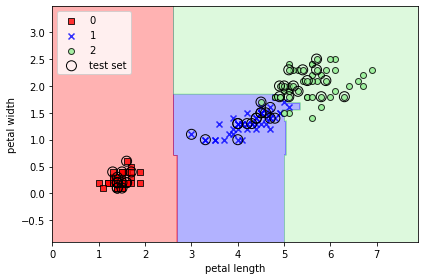

In [37]:
#랜덤 포레스트 분류기 구성
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

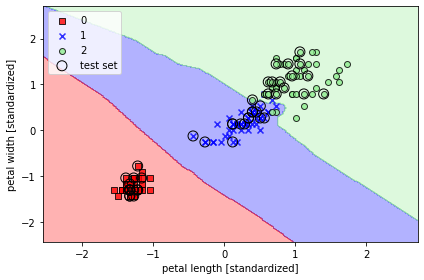

In [39]:
##K-최근접 이웃(K-Nearest Neighborhood, KNN)
#유클라디안 거리 측정 방식을 사용한 KNN모델
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()